In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

In [2]:
df = pd.read_csv(r"train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# sütunları açıklayan datafram --> df_explain

my_dict = {
    "Meanings": {"Survived": "Survival [0 = No, 1 = Yes]", "Pclass": "A proxy for socio-economic status [1 = upper, 2 = middle, 3 = lower]",
                 "Sex": "Sex", "Age": "Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5", 
                 "SibSp": "of siblings/Spouses aboard the Titanic. The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister | Spouse = husband, wife (mistresses and fiancés were ignored)",
                 "Parch": "of parents/children aboard the Titanic. The dataset defines family relations in this way... Parent = mother, father | Child = daughter, son, stepdaughter, stepson | Some children travelled only with a nanny, therefore parch=0 for them.", 
                 "Ticket": "Ticket number",
                 "Fare": "Passenger fare", "Cabin": "cabin number", 
                 "Embarked": "Port of Emarkation [C = Cherbourg, Q = Queenstown, S = Southampton]"}
}

df_explain = pd.DataFrame(my_dict)
df_explain

,Meanings
Age,Age in years. Age is fractional if less than 1...
Cabin,cabin number
Embarked,"Port of Emarkation [C = Cherbourg, Q = Queenst..."
Fare,Passenger fare
Parch,of parents/children aboard the Titanic. The da...
Pclass,"A proxy for socio-economic status [1 = upper, ..."
Sex,Sex
SibSp,of siblings/Spouses aboard the Titanic. The da...
Survived,"Survival [0 = No, 1 = Yes]"
Ticket,Ticket number


# **1) Barplot**

    Bir feature içerisinde, elemanların birbirlerine göre ne kadar çok veya ne kadar az olduğunu görürüz.

    Örneğin Sex isimli feature içerisinde male ve female isminde iki adet eleman yer almaktadır. Bunlardan hangisi daha çok hangisi daha az? görmek için Barplot çizelim:

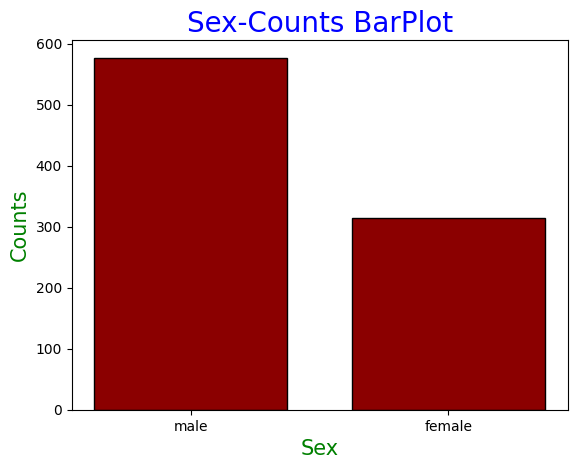

In [5]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
sex_counts=df['Sex'].value_counts()

plt.bar(x, sex_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, sex_counts.index)
plt.xlabel('Sex', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Sex-Counts BarPlot', size=20, color='blue')
plt.show()

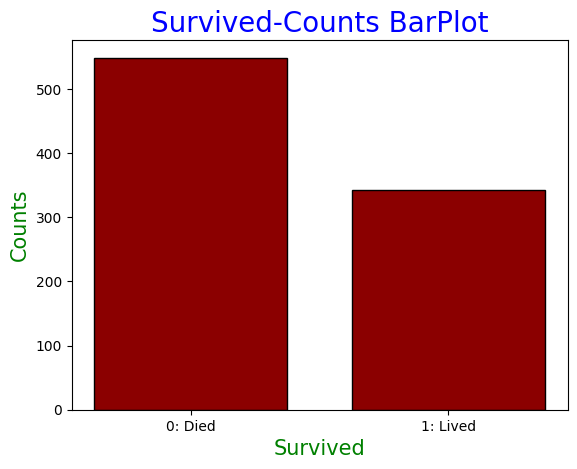

In [6]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
survived_counts=df['Survived'].value_counts()

plt.bar(x, survived_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, ['0: Died', '1: Lived'])
plt.xlabel('Survived', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived-Counts BarPlot', size=20, color='blue')
plt.show()

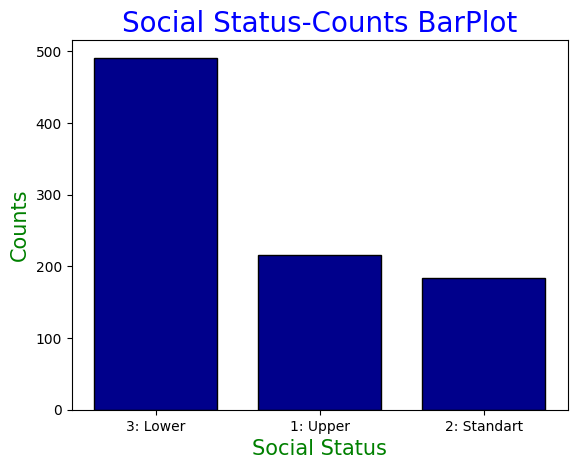

In [7]:
width = 0.15 # the width of the bars
x = [0, 0.2, 0.4] # the bar positions on x-axis
pclass_counts=df['Pclass'].value_counts()

plt.bar(x, pclass_counts, width, color='darkblue', edgecolor = 'black')
plt.xticks(x, ['3: Lower', '1: Upper', '2: Standart'])
plt.xlabel('Social Status', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Social Status-Counts BarPlot', size=20, color='blue')
plt.show()

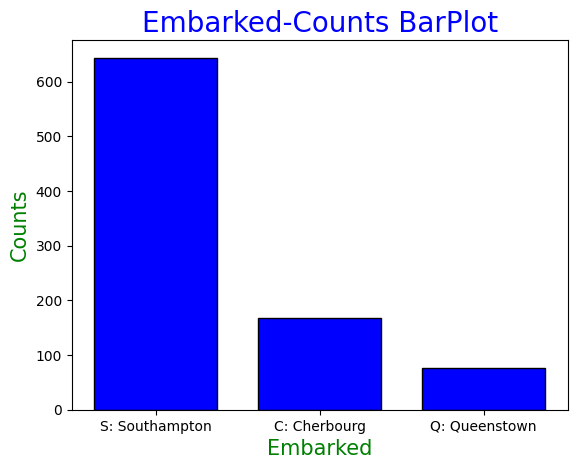

In [8]:
width = 0.15 # the width of the bars
x = [0, 0.2, 0.4] # the bar positions on x-axis
embarked_counts=df['Embarked'].value_counts()

plt.bar(x, embarked_counts, width, color='blue', edgecolor = 'black')
plt.xticks(x, ['S: Southampton', 'C: Cherbourg', 'Q: Queenstown'])
plt.xlabel('Embarked', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Embarked-Counts BarPlot', size=20, color='blue')
plt.show()

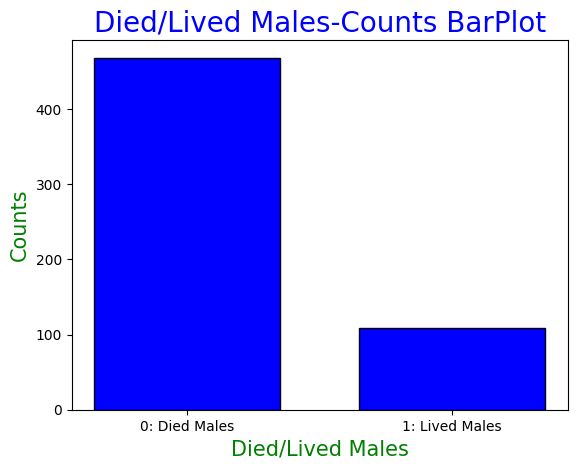

In [9]:
male = df[df['Sex'] == 'male']

width = 0.7 # widths of bars
x = [0, 1] # the bar positions on x-axis
male_survived_counts = male['Survived'].value_counts()

plt.bar(x, male_survived_counts, width, color='blue', edgecolor = 'black')
plt.xticks(x, ['0: Died Males', '1: Lived Males'])
plt.xlabel('Died/Lived Males', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Died/Lived Males-Counts BarPlot', size=20, color='blue')
plt.show()



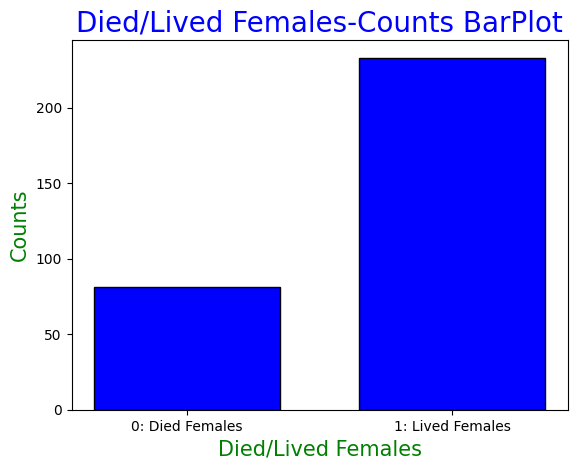

In [10]:
female = df[df['Sex'] == 'female']

width = 0.7 # widths of bars
x = [0, 1] # the bar positions on x-axis
female_survived_counts = female['Survived'].value_counts()
female_survived_counts = female_survived_counts.sort_values()

plt.bar(x, female_survived_counts, width, color='blue', edgecolor = 'black')
plt.xticks(x, ['0: Died Females', '1: Lived Females'])
plt.xlabel('Died/Lived Females', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Died/Lived Females-Counts BarPlot', size=20, color='blue')
plt.show()



In [11]:
df_explain.loc['Pclass', 'Meanings']

'A proxy for socio-economic status [1 = upper, 2 = middle, 3 = lower]'

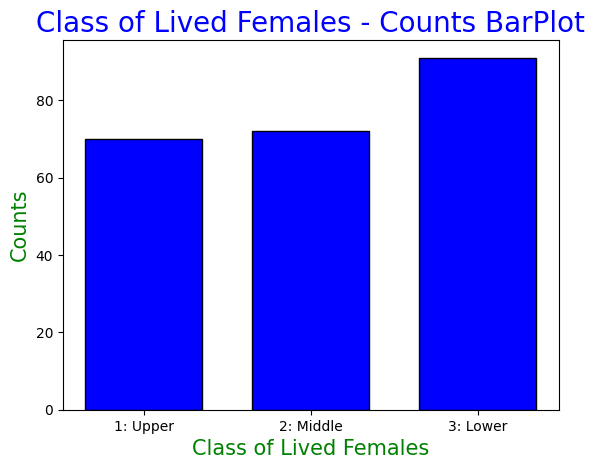

In [12]:
female_live = female[female['Survived'] == 1]
width = 0.7
x = [0, 1, 2]
female_live_class_count = female_live['Pclass'].value_counts()
female_live_class_count = female_live_class_count.sort_values()

plt.bar(x, female_live_class_count, width, color='blue', edgecolor = 'black')
plt.xticks(x, ['1: Upper', '2: Middle', '3: Lower'])
plt.xlabel('Class of Lived Females', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Class of Lived Females - Counts BarPlot', size=20, color='blue')
plt.show()

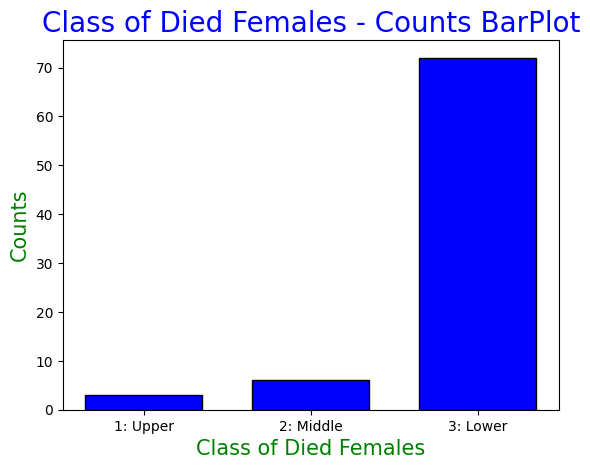

In [13]:
female_died = female[female['Survived'] == 0]
width = 0.7
x = [0, 1, 2]
female_died_class_count = female_died['Pclass'].value_counts()
female_died_class_count = female_died_class_count.sort_values()

plt.bar(x, female_died_class_count, width, color='blue', edgecolor = 'black')
plt.xticks(x, ['1: Upper', '2: Middle', '3: Lower'])
plt.xlabel('Class of Died Females', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Class of Died Females - Counts BarPlot', size=20, color='blue')
plt.show()

# 🥎 **SONUÇ 1: Upper and Middle class females were survived.**

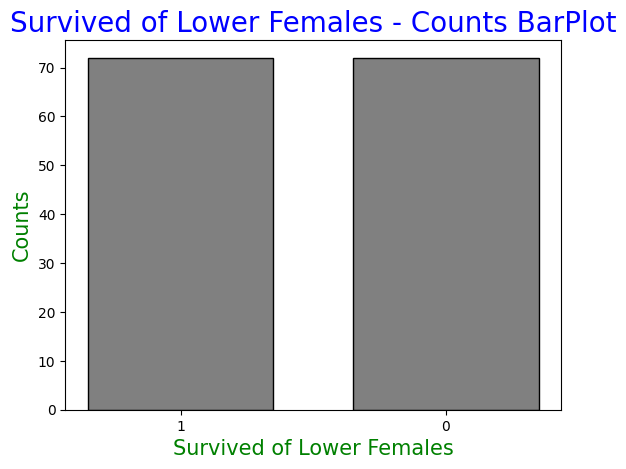

In [14]:
# How many percant died Lower Class of Females?

female_lower = female[female['Pclass'] == 3]
width = 0.7
x = [0, 1]
female_lower_survived_counts = female_lower['Survived'].value_counts()
female_lower_survived_counts = female_lower_survived_counts.sort_values()

plt.bar(x, female_lower_survived_counts, width, color='gray', edgecolor='black')
plt.xticks(x, female_lower_survived_counts.index)
plt.xlabel('Survived of Lower Females', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived of Lower Females - Counts BarPlot', size=20, color='blue')
plt.show()

# 🥎 **SONUÇ 2: Lower sınıfındaki kadınların yarısı ölüp yarısı yaşamış. İncelemesini sonraya bırak.**

In [15]:
male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


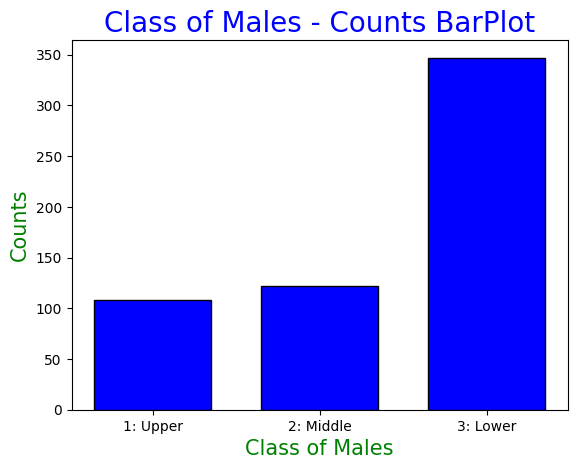

In [16]:
width = 0.7
x = [0, 1, 2]
male_class_counts = male['Pclass'].value_counts()
male_class_counts = male_class_counts.sort_values()

plt.bar(x, male_class_counts, width, color='blue', edgecolor = 'black')
plt.xticks(x, ['1: Upper', '2: Middle', '3: Lower'])
plt.xlabel('Class of Males', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Class of Males - Counts BarPlot', size=20, color='blue')
plt.show()

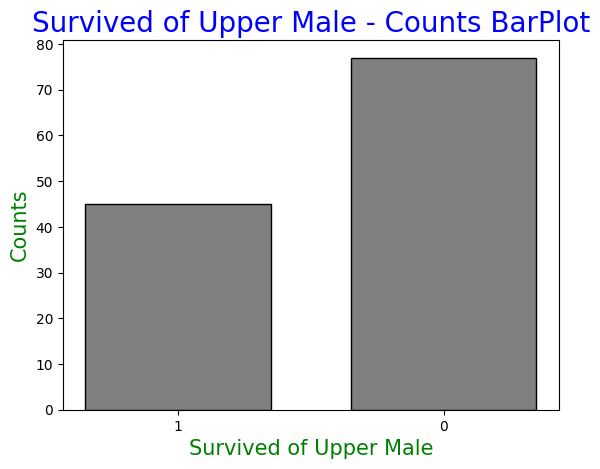

In [17]:
male_upper = male[male['Pclass'] == 1]
width = 0.7
x = [0, 1]
male_upper_survived_counts = male_upper['Survived'].value_counts()
male_upper_survived_counts = male_upper_survived_counts.sort_values()

plt.bar(x, male_upper_survived_counts, width, color='gray', edgecolor='black')
plt.xticks(x, male_upper_survived_counts.index)
plt.xlabel('Survived of Upper Male', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived of Upper Male - Counts BarPlot', size=20, color='blue')
plt.show()

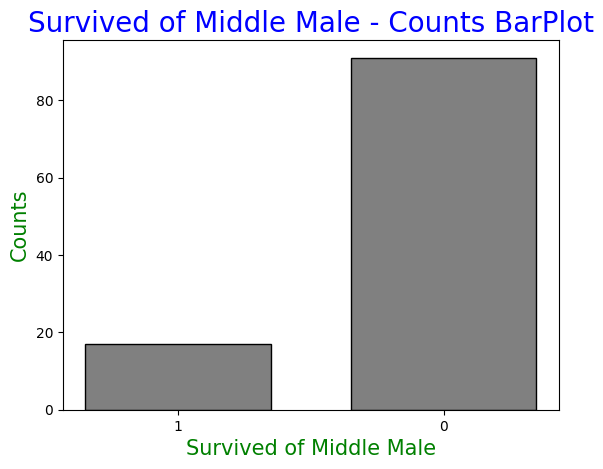

In [18]:
male_middle = male[male['Pclass'] == 2]
width = 0.7
x = [0, 1]
male_middle_survived_counts = male_middle['Survived'].value_counts()
male_middle_survived_counts = male_middle_survived_counts.sort_values()

plt.bar(x, male_middle_survived_counts, width, color='gray', edgecolor='black')
plt.xticks(x, male_middle_survived_counts.index)
plt.xlabel('Survived of Middle Male', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived of Middle Male - Counts BarPlot', size=20, color='blue')
plt.show()

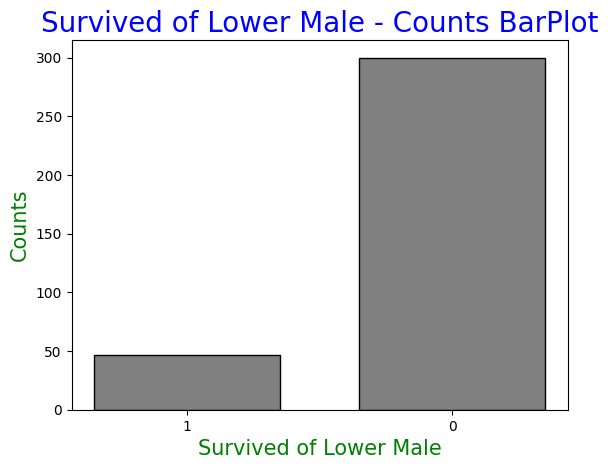

In [19]:
male_lower = male[male['Pclass'] == 3]
width = 0.7
x = [0, 1]
male_lower_survived_counts = male_lower['Survived'].value_counts()
male_lower_survived_counts = male_lower_survived_counts.sort_values()

plt.bar(x, male_lower_survived_counts, width, color='gray', edgecolor='black')
plt.xticks(x, male_lower_survived_counts.index)
plt.xlabel('Survived of Lower Male', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived of Lower Male - Counts BarPlot', size=20, color='blue')
plt.show()

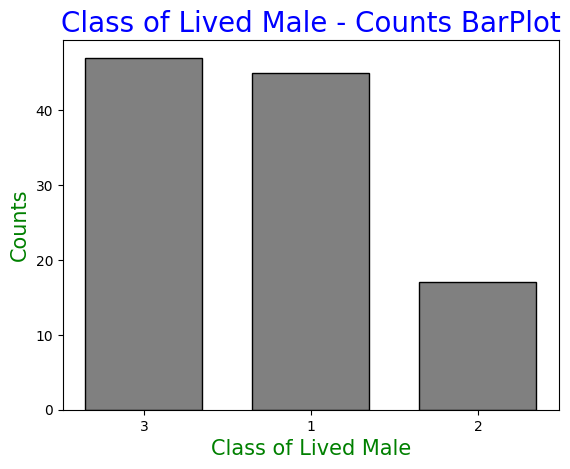

In [20]:
# Hayatta kalan erkeklerin sınıflarının görselleştir

male_live = male[male['Survived'] == 1]
width = 0.7
x = [0, 1, 2]
male_live_class_counts = male_live['Pclass'].value_counts()

plt.bar(x, male_live_class_counts, width, color='gray', edgecolor='black')
plt.xticks(x, male_live_class_counts.index)
plt.xlabel('Class of Lived Male', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Class of Lived Male - Counts BarPlot', size=20, color='blue')
plt.show()

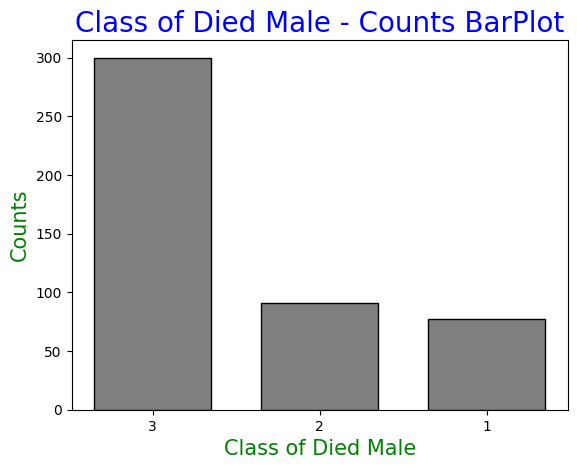

In [21]:
# Hayatta kalan erkeklerin sınıflarının görselleştir

male_died = male[male['Survived'] == 0]
width = 0.7
x = [0, 1, 2]
male_died_class_counts = male_died['Pclass'].value_counts()

plt.bar(x, male_died_class_counts, width, color='gray', edgecolor='black')
plt.xticks(x, male_died_class_counts.index)
plt.xlabel('Class of Died Male', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Class of Died Male - Counts BarPlot', size=20, color='blue')
plt.show()

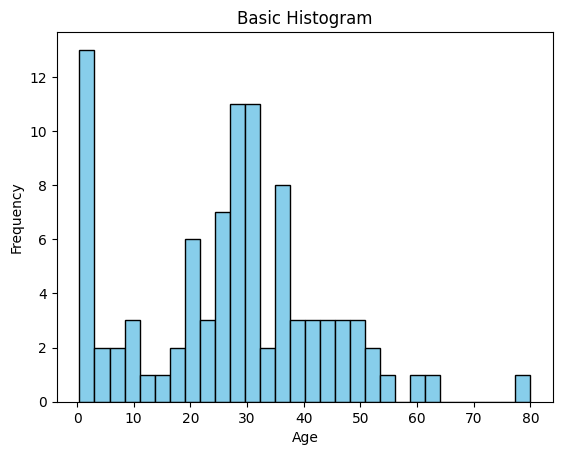

In [22]:
# Generate random data for the histogram

data = male_live['Age'] 

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

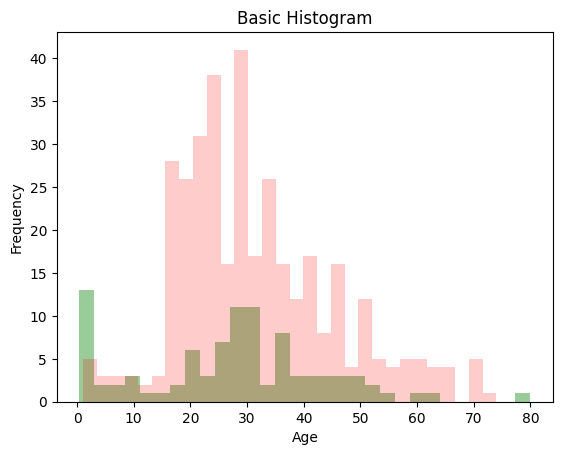

In [23]:
# Generate random data for the histogram
data1 = male_live['Age'] 
data2 = male_died['Age'] 

plt.hist(data1, bins=30, color='green', alpha=0.4)
plt.hist(data2, bins=30, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

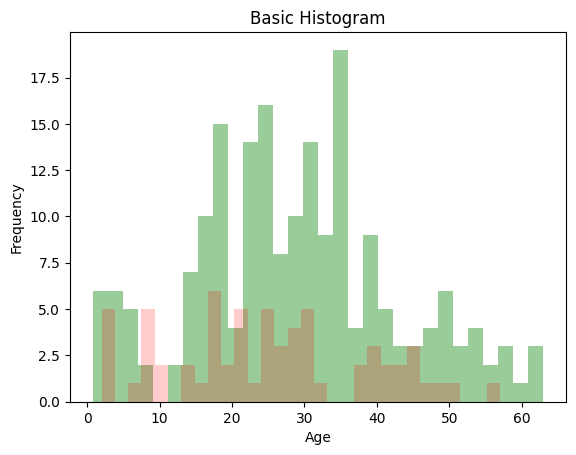

In [24]:
# Generate random data for the histogram
data1 = female_live['Age'] 
data2 = female_died['Age'] 

plt.hist(data1, bins=30, color='green', alpha=0.4)
plt.hist(data2, bins=30, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

# 🥎 **SONUÇ 3: 56 yaşından büyük ve 75 yaşından küçük olan erkekler için Survived = 1**

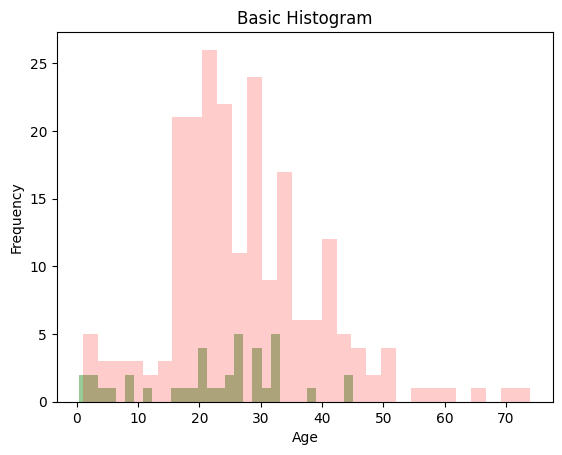

In [25]:
male_lower_live = male_lower[male_lower['Survived'] == 1]
male_lower_died = male_lower[male_lower['Survived'] == 0]
# Generate random data for the histogram
data1 = male_lower_live['Age'] 
data2 = male_lower_died['Age'] 

plt.hist(data1, bins=30, color='green', alpha=0.4)
plt.hist(data2, bins=30, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

# 🥎 **SONUÇ 4: 3. sınıf erkeklerin 33 yaş üstü için Survived = 0**

# 🥎 **SONUÇ 1: 1. ve 2. sınıf kadınlar için Survived = 1**

# 🥎 **SONUÇ 4: 3. sınıf erkeklerin 33 yaş üstü için Survived = 0**

# NOT: Aşağıda yapılan işlemler sonucunda SONUÇ 1 içerisinde yer alan kişiler listeden silinmiştir.

In [26]:
x1 = len(df)
kadınlar = df[df['Sex'] == 'female']
birinci_ikinci_kadınlar = kadınlar[kadınlar['Pclass'] != 3]
indexler = birinci_ikinci_kadınlar.index
df = df.drop(index=indexler)
x2 = len(df)

print(f"Çıkarılmalardan önceki kişi sayısı  --> {x1}")
print(f"Çıkarılmalardan sonraki kişi sayısı --> {x2}")
print(f"Çıkarılan kişi sayısı               --> {x1 - x2}")

Çıkarılmalardan önceki kişi sayısı  --> 891
Çıkarılmalardan sonraki kişi sayısı --> 721
Çıkarılan kişi sayısı               --> 170


# NOT: Aşağıda yapılan işlemler sonucunda SONUÇ 4 içerisinde yer alan kişiler listeden silinmiştir.

    3. sınıf erkeklerin 33 yaş üstü

In [27]:
x1 = len(df)
erkekler = df[df['Sex'] == 'male']
üçüncü_erkekler = erkekler[erkekler['Pclass'] == 3]
üçüncü_33üstü_erkekler = üçüncü_erkekler[üçüncü_erkekler['Age'] > 33]
indexler = üçüncü_33üstü_erkekler.index
df = df.drop(index=indexler)
x2 = len(df)

print(f"Çıkarılmalardan önceki kişi sayısı  --> {x1}")
print(f"Çıkarılmalardan sonraki kişi sayısı --> {x2}")
print(f"Çıkarılan kişi sayısı               --> {x1 - x2}")

Çıkarılmalardan önceki kişi sayısı  --> 721
Çıkarılmalardan sonraki kişi sayısı --> 663
Çıkarılan kişi sayısı               --> 58


# incelemelere devam

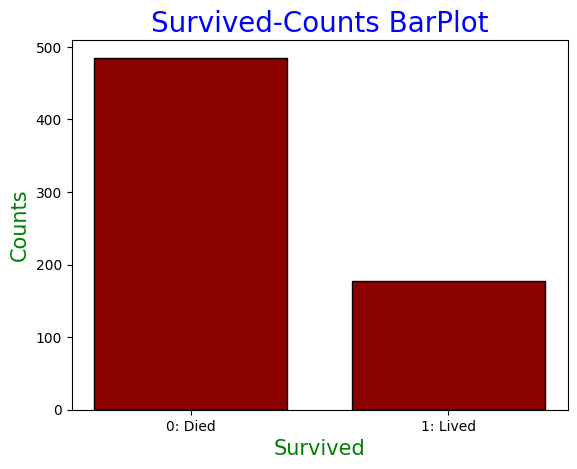

In [28]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
survived_counts = df['Survived'].value_counts()

plt.bar(x, survived_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, ['0: Died', '1: Lived'])
plt.xlabel('Survived', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived-Counts BarPlot', size=20, color='blue')
plt.show()

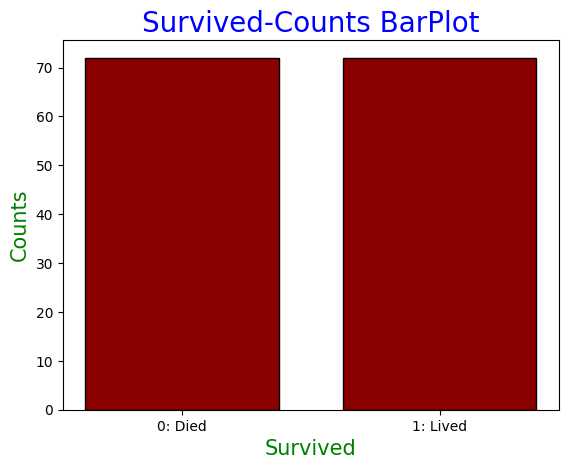

In [29]:
df_kadınlar = df[df['Sex'] == 'female']
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
survived_counts_kadınlar = df_kadınlar['Survived'].value_counts()

plt.bar(x, survived_counts_kadınlar, width, color='darkred', edgecolor = 'black')
plt.xticks(x, ['0: Died', '1: Lived'])
plt.xlabel('Survived', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived-Counts BarPlot', size=20, color='blue')
plt.show()

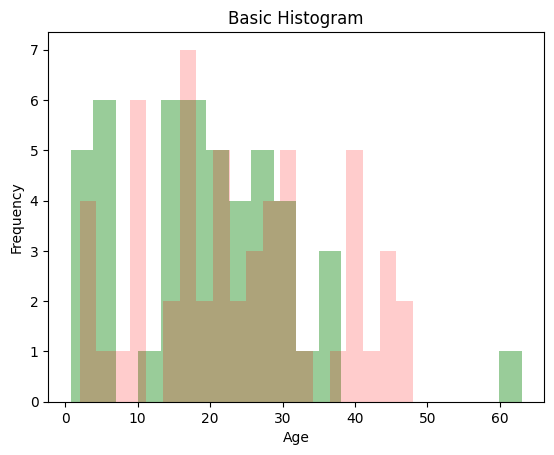

In [30]:
kadınlar_live = df_kadınlar[df_kadınlar['Survived'] == 1]
kadınlar_dead = df_kadınlar[df_kadınlar['Survived'] == 0]
# Generate random data for the histogram
data1 = kadınlar_live['Age'] 
data2 = kadınlar_dead['Age'] 

plt.hist(data1, bins=20, color='green', alpha=0.4)
plt.hist(data2, bins=20, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

# 🥎 **SONUÇ 5: 38 yaşından büyük kadınlar için Survived = 0**

In [32]:
x1 = len(df)
df_kadınlar = df[df['Sex'] == 'female']
kadınlar_38üstü = df_kadınlar[df_kadınlar['Age'] > 38]
indexler = kadınlar_38üstü.index
df = df.drop(index=indexler)
x2 = len(df)

print(f"Çıkarılmalardan önceki kişi sayısı  --> {x1}")
print(f"Çıkarılmalardan sonraki kişi sayısı --> {x2}")
print(f"Çıkarılan kişi sayısı               --> {x1 - x2}")

Çıkarılmalardan önceki kişi sayısı  --> 663
Çıkarılmalardan sonraki kişi sayısı --> 651
Çıkarılan kişi sayısı               --> 12


# incelemelere devam

In [33]:
df = df.drop(index=[679, 737])      # bunu silme sebebim, Fare değerlerinin outlier olması

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
kadınlar = df[df['Sex'] == 'female']
erkekler = df[df['Sex'] == 'male']

ölen_kadınlar = kadınlar[kadınlar['Survived'] == 0]
yaşayan_kadınlar = kadınlar[kadınlar['Survived'] == 1]

ölen_erkekler = erkekler[erkekler['Survived'] == 0]
yaşayan_erkekler = erkekler[erkekler['Survived'] == 1]



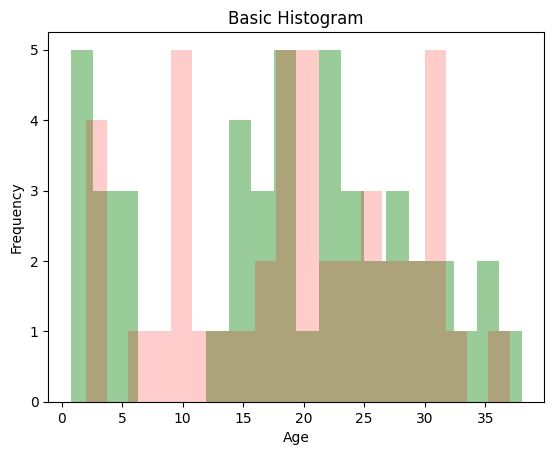

In [36]:
yaşayan_kadınlar = kadınlar[kadınlar['Survived'] == 1]
ölen_kadınlar = kadınlar[kadınlar['Survived'] == 0]
# Generate random data for the histogram
data1 = yaşayan_kadınlar['Age'] 
data2 = ölen_kadınlar['Age'] 

plt.hist(data1, bins=20, color='green', alpha=0.4)
plt.hist(data2, bins=20, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

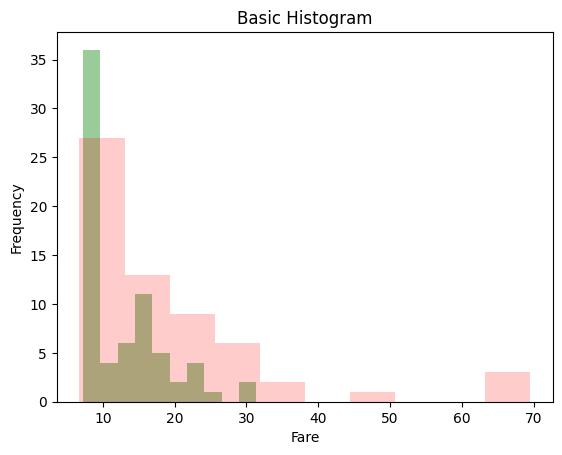

In [39]:
data1 = yaşayan_kadınlar['Fare'] 
data2 = ölen_kadınlar['Fare'] 

plt.hist(data1, bins=10, color='green', alpha=0.4)
plt.hist(data2, bins=10, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

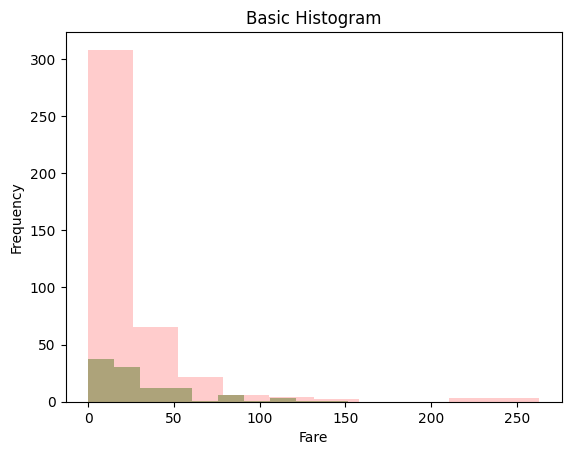

In [41]:
data1 = yaşayan_erkekler['Fare'] 
data2 = ölen_erkekler['Fare'] 

plt.hist(data1, bins=10, color='green', alpha=0.4)
plt.hist(data2, bins=10, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

    0-25 arası Fare olan erkekler

In [47]:
filtre_erkek = erkekler[erkekler['Fare'] < 26]
filtre_erkek_yaşayan = filtre_erkek[filtre_erkek['Survived'] == 1]
filtre_erkek_ölen = filtre_erkek[filtre_erkek['Survived'] == 0]

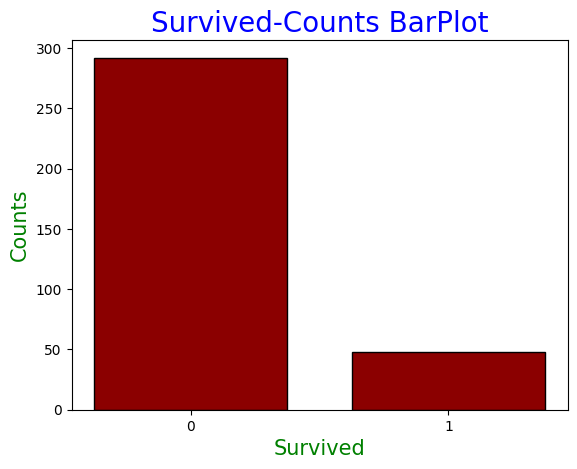

In [52]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
filtre_erkek_survived_counts = filtre_erkek['Survived'].value_counts()

plt.bar(x, filtre_erkek_survived_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, filtre_erkek_survived_counts.index)
plt.xlabel('Survived', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived-Counts BarPlot', size=20, color='blue')
plt.show()

# 🥎 **SONUÇ 6: Fare değeri 26'dan küçük olan erkekler için için Survived = 0**

In [60]:
x1 = len(df)
erkekler = df[df['Sex'] == 'male']
filtre_erkek = erkekler[erkekler['Fare'] < 26]
indexler = filtre_erkek.index
df = df.drop(index=indexler)
x2 = len(df)

print(f"Çıkarılmalardan önceki kişi sayısı  --> {x1}")
print(f"Çıkarılmalardan sonraki kişi sayısı --> {x2}")
print(f"Çıkarılan kişi sayısı               --> {x1 - x2}")

Çıkarılmalardan önceki kişi sayısı  --> 649
Çıkarılmalardan sonraki kişi sayısı --> 309
Çıkarılan kişi sayısı               --> 340


# incelemelere devam

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [62]:
kadınlar = df[df['Sex'] == 'female']
erkekler = df[df['Sex'] == 'male']

ölen_kadınlar = kadınlar[kadınlar['Survived'] == 0]
yaşayan_kadınlar = kadınlar[kadınlar['Survived'] == 1]

ölen_erkekler = erkekler[erkekler['Survived'] == 0]
yaşayan_erkekler = erkekler[erkekler['Survived'] == 1]

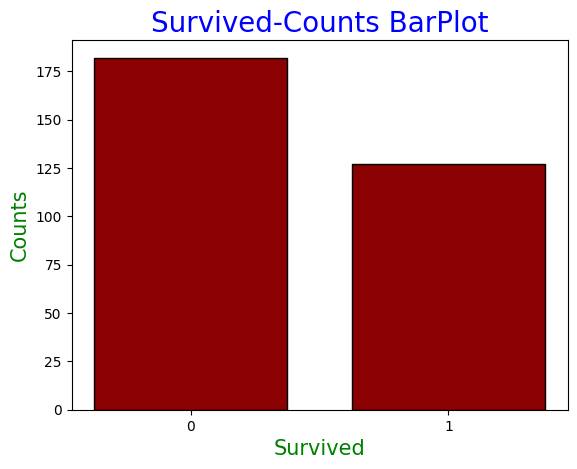

In [63]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
df_survived_counts = df['Survived'].value_counts()

plt.bar(x, df_survived_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, df_survived_counts.index)
plt.xlabel('Survived', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived-Counts BarPlot', size=20, color='blue')
plt.show()

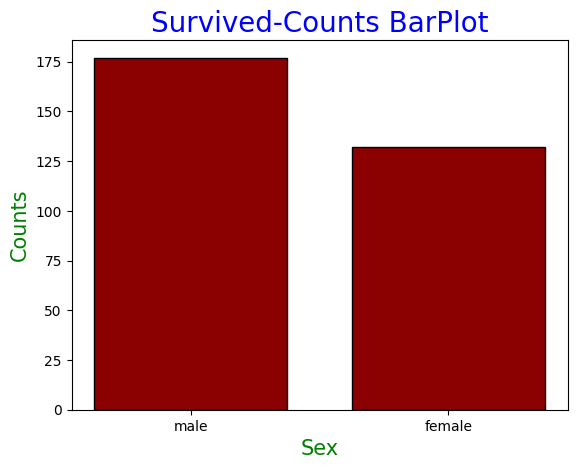

In [64]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
df_sex_counts = df['Sex'].value_counts()

plt.bar(x, df_sex_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, df_sex_counts.index)
plt.xlabel('Sex', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived-Counts BarPlot', size=20, color='blue')
plt.show()

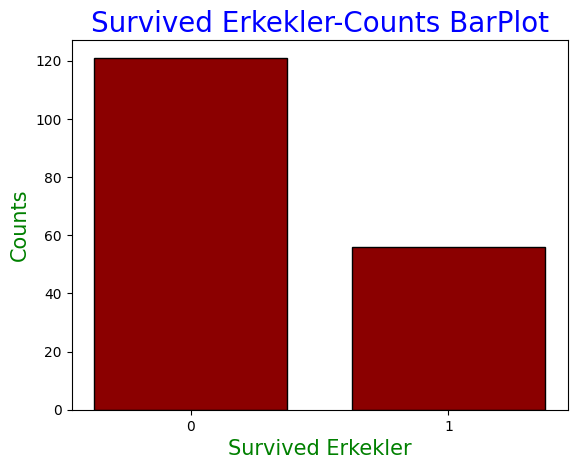

In [65]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
erkekler_survived_counts = erkekler['Survived'].value_counts()

plt.bar(x, erkekler_survived_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, erkekler_survived_counts.index)
plt.xlabel('Survived Erkekler', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived Erkekler-Counts BarPlot', size=20, color='blue')
plt.show()

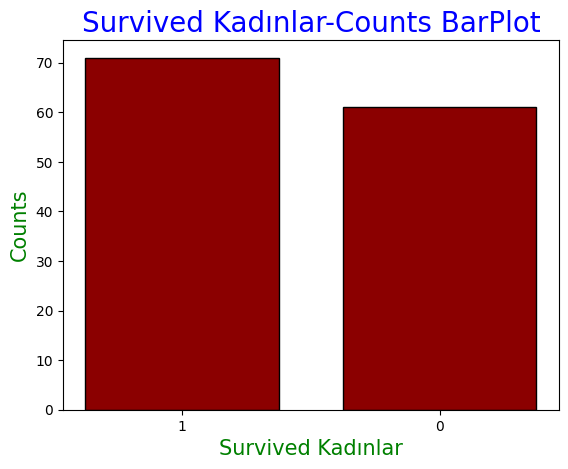

In [66]:
width = 0.15 # the width of the bars
x = [0, 0.2] # the bar positions on x-axis
kadınlar_survived_counts = kadınlar['Survived'].value_counts()

plt.bar(x, kadınlar_survived_counts, width, color='darkred', edgecolor = 'black')
plt.xticks(x, kadınlar_survived_counts.index)
plt.xlabel('Survived Kadınlar', size=15, color='green')
plt.ylabel('Counts', size=15, color='green')
plt.title('Survived Kadınlar-Counts BarPlot', size=20, color='blue')
plt.show()

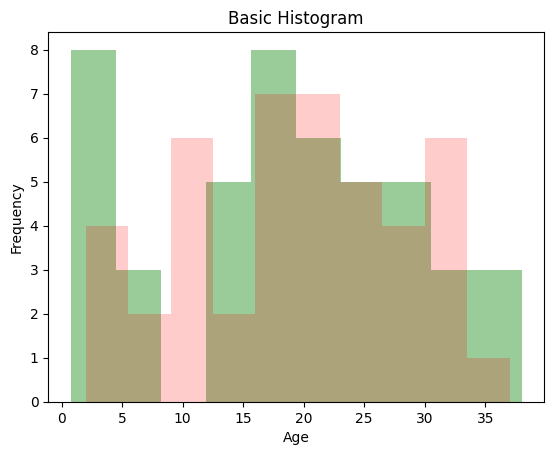

In [68]:
data1 = yaşayan_kadınlar['Age'] 
data2 = ölen_kadınlar['Age'] 

plt.hist(data1, bins=10, color='green', alpha=0.4)
plt.hist(data2, bins=10, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

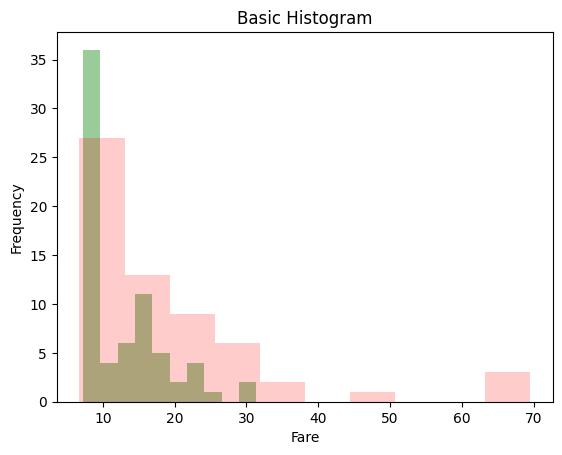

In [70]:
data1 = yaşayan_kadınlar['Fare'] 
data2 = ölen_kadınlar['Fare'] 

plt.hist(data1, bins=10, color='green', alpha=0.4)
plt.hist(data2, bins=10, color='red', alpha=0.2)

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Basic Histogram')    

# Display the plot
plt.show()

In [72]:
ölen_kadınlar[ölen_kadınlar['Fare'] > 30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.900,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.550,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.550,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.550,NaN,S


# 🥎 **SONUÇ 7: Fare değeri 30'dan büyük olan kadınlar için için Survived = 0**

In [73]:
x1 = len(df)
kadınlar = df[df['Sex'] == 'female']
filtre_kadınlar = kadınlar[kadınlar['Fare'] > 30]
indexler = filtre_kadınlar.index
df = df.drop(index=indexler)
x2 = len(df)

print(f"Çıkarılmalardan önceki kişi sayısı  --> {x1}")
print(f"Çıkarılmalardan sonraki kişi sayısı --> {x2}")
print(f"Çıkarılan kişi sayısı               --> {x1 - x2}")

Çıkarılmalardan önceki kişi sayısı  --> 309
Çıkarılmalardan sonraki kişi sayısı --> 297
Çıkarılan kişi sayısı               --> 12


# incelemelere devam

In [74]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [75]:
kadınlar = df[df['Sex'] == 'female']
erkekler = df[df['Sex'] == 'male']

ölen_kadınlar = kadınlar[kadınlar['Survived'] == 0]
yaşayan_kadınlar = kadınlar[kadınlar['Survived'] == 1]

ölen_erkekler = erkekler[erkekler['Survived'] == 0]
yaşayan_erkekler = erkekler[erkekler['Survived'] == 1]